# Klasifikasi Data Medical Cost
### Mohammad Haidar Alvin Purwana
06211540000131

Medical Cost Personal Datasets merupakan serangkaian data yang berisikan informasi seputar pengguna asuransi kesehatan. 
Dataset ini memiliki 7 variabel yang diantaranya:

V1: usia pengguna

V2: jenis kelamin pengguna

V3: body mass index (BMI) pengguna

V4: keterangan sebagai perokok

V5: jumlah tanggungan anak yang di-cover oleh asuransi

V6: asal region (daerah)

V7: biaya premi yang dibayarkan dalam US Dollar ($)

V1, V2, V4, V5, dan V6 merupakan data diskrit berupa skala nominal. Sedangkan V3 dan V7 merupakan data kontinyu berupa skala rasio. Untuk informasi lebih lanjut dapat dilihat pada pembahasan di bawah ini. 

# IMPORT PACKAGE

In [62]:
#import pandas and numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB


In [99]:
#input dataset
data=pd.read_excel("Medical Cost.xls")
data.head()

,age,gender,bmi,children,smoker stats,origin,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [100]:
x = data.drop('smoker stats',axis=1)
y = data['smoker stats']

In [101]:
x.head()

,age,gender,bmi,children,origin,charges
0,19,0,27.900,0,4,16884.92400
1,18,1,33.770,1,3,1725.55230
2,28,1,33.000,3,3,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


In [102]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker stats, dtype: int64

# DETEKSI MISSING VALUE

In [103]:
np.sum(data.isnull())

age             0
gender          0
bmi             0
children        0
smoker stats    0
origin          0
charges         0
dtype: int64

In [104]:
#Tidak terdapat missing value dari setiap variabel

# BOXPLOT UNTUK DATA KONTINYU

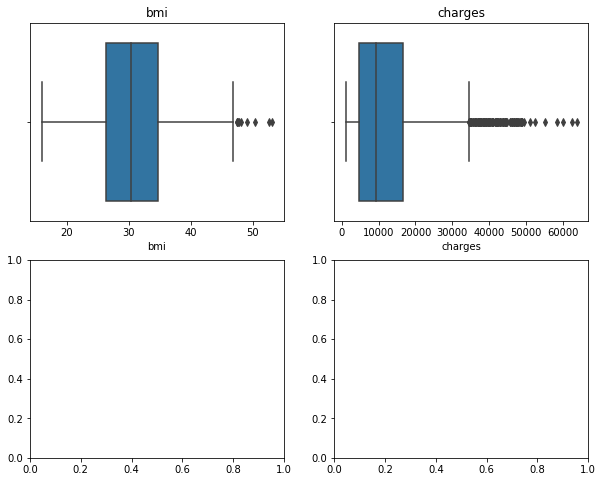

In [105]:
data_cont = pd.read_excel("Medical Cost Cont.xls")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
feature_index = 0
for ii in range(1):
    for jj in range(2):
        ax = sns.boxplot(data_cont.iloc[:, feature_index], ax=axes[ii,jj])
        ax.set(title=data_cont.columns.values[feature_index])      
        feature_index += 1
plt.show()

# CEK KORELASI DATA KONTINYU

In [106]:
AKat = data.drop(['bmi','charges'],axis=1)
AKon = data.drop(['age','gender','children','smoker stats','origin'],axis=1)

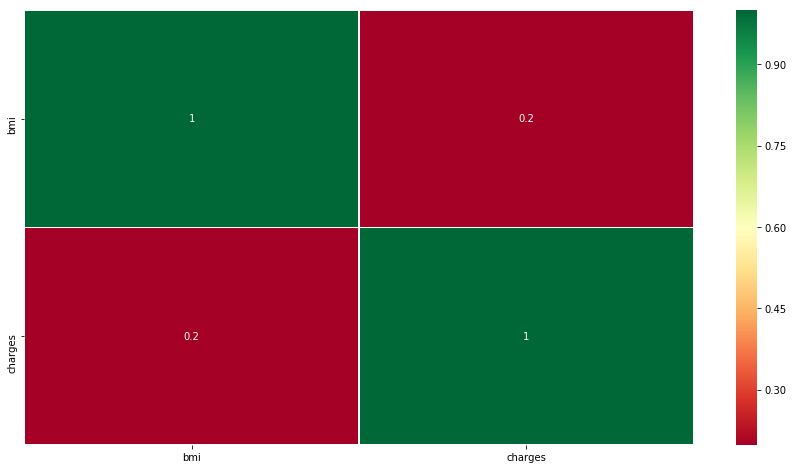

In [107]:
sns.heatmap(AKon.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

# STATISTIKA DESKRIPTIF

In [109]:
data.describe()

,age,gender,bmi,children,smoker stats,origin,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,3.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


# PLOT KOMBINASI 2 VARIABEL KONTINYU

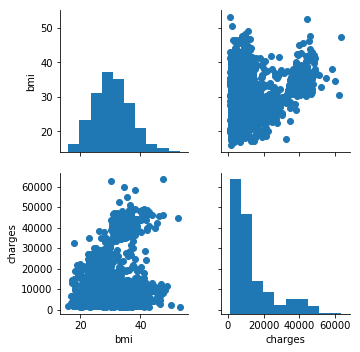

In [113]:
g = sns.PairGrid(AKon)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

# MEMODELKAN DENGAN kNN

In [114]:
data['target'] = LabelEncoder().fit_transform(data['smoker stats'])

In [115]:
data.head()

,age,gender,bmi,children,smoker stats,origin,charges,target
0,19,0,27.900,0,1,4,16884.92400,1
1,18,1,33.770,1,0,3,1725.55230,0
2,28,1,33.000,3,0,3,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,0


In [116]:
data.tail()

,age,gender,bmi,children,smoker stats,origin,charges,target
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,2,2205.9808,0
1335,18,0,36.85,0,0,3,1629.8335,0
1336,21,0,25.80,0,0,4,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


# TRAIN TEST SPLIT (memisahkan data test dan data training)

In [156]:
y = data['target']
X = data.drop(['smoker stats','target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 500)

# KNN CLASSIFIER

In [157]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [158]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [159]:
knn.score(X_train, y_train)

0.9345794392523364

# TEST SET PREDICTION

In [160]:
y_predict = knn.predict(X_test)

In [161]:
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[208   7]
 [  5  48]]


In [162]:
species = data['smoker stats'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=species, index=species)

In [163]:
conf_matrix_df

,1,0
1,208,7
0,5,48


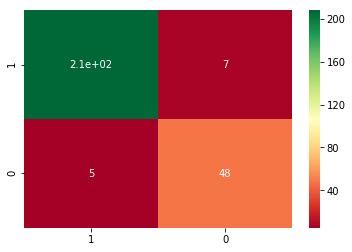

In [164]:
sns.heatmap(conf_matrix_df, annot=True, cmap="RdYlGn")
plt.show()

In [165]:
accuracy_score(y_test, y_predict)

0.9552238805970149

# NAIVE BAYES

In [166]:
nb = GaussianNB()

In [167]:
# Memodelkan data training dengan Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [168]:
# Menghitung Akurasi
nb.score(X_train, y_train)

0.8990654205607477

TEST SET PREDICTION NB

In [169]:
classif_name = ['NB']

In [170]:
y_predict = {}

In [171]:
y_predict['NB'] = nb.predict(X_test)

# CONFUSION MATRIX

In [172]:
# Menampilkan nama kelas
A15 = data['smoker stats'].unique()
# Menyediakan ruang untuk confusion matrix
conf_matrix = {}
for name in classif_name:
    conf_matrix[name] = pd.DataFrame(data=confusion_matrix(y_test, y_predict[name]), 
                                     columns=A15, 
                                     index=A15)

In [173]:
conf_matrix['NB']

,1,0
1,209,6
0,19,34


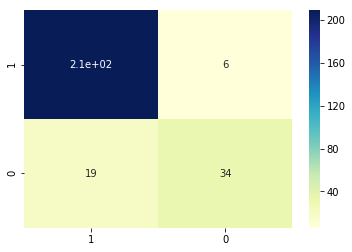

In [174]:
sns.heatmap(conf_matrix['NB'], annot=True, cmap="YlGnBu")
plt.show()


In [175]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.9067
